# MAT281 - Laboratorio N°06



## Problema 01
<img src="./images/logo_iris.jpg" width="360" height="360" align="center"/>

El **Iris dataset** es un conjunto de datos que contine una  muestras de tres especies de Iris (Iris setosa, Iris virginica e Iris versicolor). Se midió cuatro rasgos de cada muestra: el largo y ancho del sépalo y pétalo, en centímetros.

Lo primero es cargar el conjunto de datos y ver las primeras filas que lo componen:

In [1]:
# librerias
 
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns 
pd.set_option('display.max_columns', 500)  # Ver más columnas de los dataframes


# Ver gráficos de matplotlib en jupyter notebook/lab
%matplotlib inline

In [2]:
# cargar datos
df = pd.read_csv(os.path.join("data","iris_contaminados.csv"))
df.columns = ['sepalLength',
                  'sepalWidth',
                  'petalLength',
                  'petalWidth',
                  'species']

df.head() 

,sepalLength,sepalWidth,petalLength,petalWidth,species
0,4.4,3.2,1.3,3.0,setosa
1,7.2,3.6,6.1,2.5,virginica
2,6.3,3.3,6.0,2.5,VIRGINICA
3,6.7,3.3,5.7,2.5,virginica
4,6.3,3.4,5.6,2.4,virginica


### Bases del experimento

Lo primero es identificar las variables que influyen en el estudio y la naturaleza de esta.

* **species**: 
    * Descripción: Nombre de la especie de Iris. 
    * Tipo de dato: *string*
    * Limitantes: solo existen tres tipos (setosa, virginia y versicolor).
* **sepalLength**: 
    * Descripción: largo del sépalo. 
    * Tipo de dato: *integer*. 
    * Limitantes: los valores se encuentran entre 4.0 y 7.0 cm.
* **sepalWidth**: 
    * Descripción: ancho del sépalo. 
    * Tipo de dato: *integer*. 
    * Limitantes: los valores se encuentran entre 2.0 y 4.5 cm.
* **petalLength**: 
    * Descripción: largo del pétalo. 
    * Tipo de dato: *integer*. 
    * Limitantes: los valores se encuentran entre 1.0 y 7.0 cm.
* **petalWidth**: 
    * Descripción: ancho del pépalo. 
    * Tipo de dato: *integer*. 
    * Limitantes: los valores se encuentran entre 0.1 y 2.5 cm.

Su objetivo es realizar un correcto **E.D.A.**, para esto debe seguir las siguientes intrucciones:

1. Realizar un conteo de elementos de la columna **species** y corregir según su criterio. Reemplace por "default" los valores nan..

In [3]:
#primeramente veré qué datos unicos tenemos:
df['species'].unique()

array(['setosa', ' virginica', 'VIRGINICA', 'virginica', 'virginica ',
       'versicolor', 'Versicolor', 'VERSICOLOR', nan, 'Setosa', 'SETOSA'],
      dtype=object)

__RESPUESTA__: una vez tengo esto, observo que muchos datos están repetidos porque tienen mayusculas y cosas así, por lo que corregiré:

In [4]:
#corregimos virginica
df.loc[df['species']=='VIRGINICA','species'] = 'virginica'
df.loc[df['species']=='virginica ','species'] = 'virginica'
df.loc[df['species']==' virginica','species'] = 'virginica'
#corregimos setosa
df.loc[df['species']=='Setosa','species'] = 'setosa'
df.loc[df['species']=='SETOSA','species'] = 'setosa'
#corregimos versicolor
df.loc[df['species']=='VERSICOLOR','species'] = 'versicolor'
df.loc[df['species']=='Versicolor','species'] = 'versicolor'
#corregimos nan
df.loc[df['species'].isnull(),'species'] = 'default'


df['species'].unique() #compruebo

array(['setosa', 'virginica', 'versicolor', 'default'], dtype=object)

2. Realizar un gráfico de box-plot sobre el largo y ancho de los petalos y sépalos. Reemplace por **0** los valores nan.

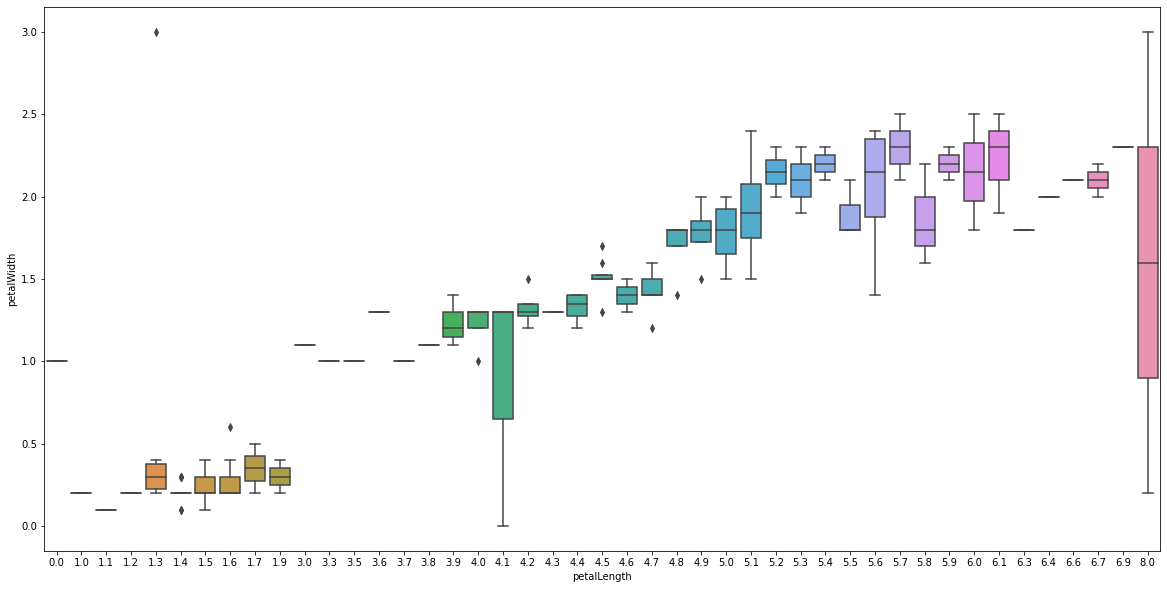

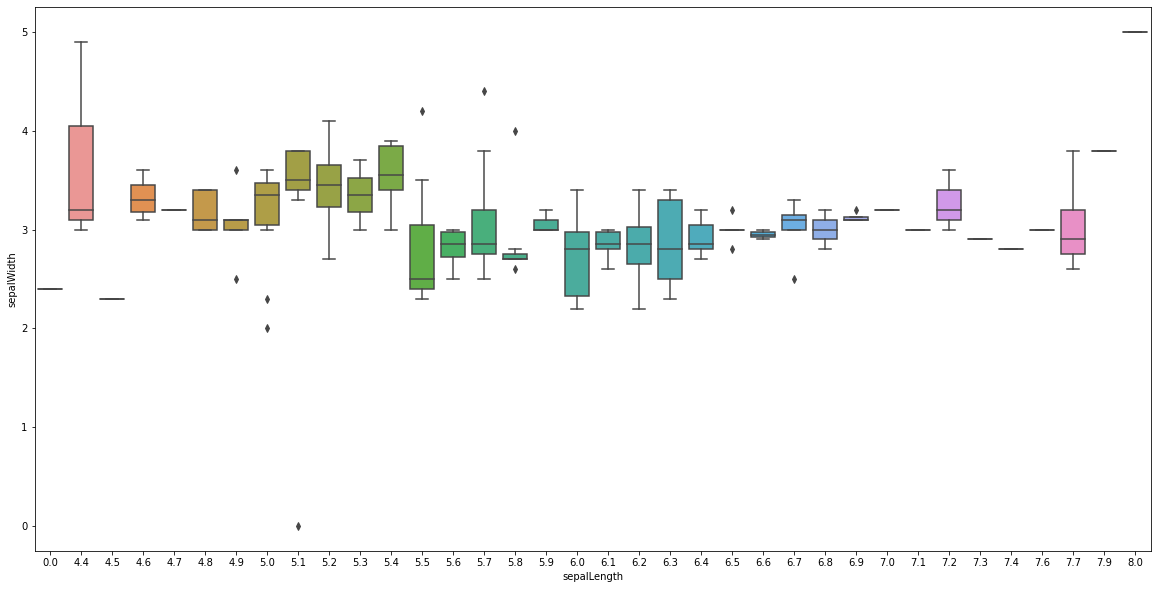

In [5]:
#eliminamos los nan de los petalos
df.loc[df['petalLength'].isnull(),'petalLength'] = 0.0

df.loc[df['petalWidth'].isnull(),'petalWidth'] = 0.0
#convertimos los datos a flotantes (si es que alguno no lo es ya)
df['petalLength']=df['petalLength'].astype(float)
df['petalWidth']=df['petalWidth'].astype(float)


#eliminamos los nan de los petalos
df.loc[df['sepalLength'].isnull(),'sepalLength'] = 0.0

df.loc[df['sepalWidth'].isnull(),'sepalWidth'] = 0.0
#convertimos los datos a flotantes (si es que alguno no lo es ya)
df['sepalLength']=df['sepalLength'].astype(float)
df['sepalWidth']=df['sepalWidth'].astype(float)


#hacemos lo box-plot solicitados

#petalos
plt.figure(figsize=(20, 10))
ax = sns.boxplot(x="petalLength", y="petalWidth", data=df)

#sepalos
plt.figure(figsize=(20, 10))
ax = sns.boxplot(x="sepalLength", y="sepalWidth", data=df)

3. Anteriormente se define un rango de valores válidos para los valores del largo y ancho de los petalos y sépalos. Agregue una columna denominada **label**  que identifique cuál de estos valores esta fuera del rango de valores válidos.

In [35]:
#filtraremos los datos para que solo queden en el rango dado
#nota: se tomará como un dato fuera de rango si no cumple con al menos 1 de los criterios, es decir,
#si en todos los criterios cumple menos en 1, entonces se considerará todo el dato como fuera de rango

mask_mag_inf =  df['petalLength']>=1
mask_mag_sup =  df['petalLength']<=7
mask_petalLength = mask_mag_inf & mask_mag_sup

mask_petalLength.unique()
mask_mag_inf =  df['petalWidth']>=0.1
mask_mag_sup =  df['petalWidth']<=2.5
mask_petalWidth = mask_mag_inf & mask_mag_sup

mask_mag_inf =  df['sepalLength']>=4
mask_mag_sup =  df['sepalLength']<=7
mask_sepalLength = mask_mag_inf & mask_mag_sup

mask_mag_inf =  df['sepalWidth']>=2
mask_mag_sup =  df['sepalWidth']<=4.5
mask_sepalWidth = mask_mag_inf & mask_mag_sup

#obtenemos todos los datos filtrados
label_mask=[mask_petalLength & mask_petalWidth & mask_sepalLength & mask_sepalWidth]

df["label"]=label_mask[0]
label=pd.DataFrame(np.zeros(150),columns = ["nombre"])
df.loc[label_mask[0],"label"] = 'dentro del rango'

df.loc[~label_mask[0],"label"] = 'fuera del rango'
df.head()


,sepalLength,sepalWidth,petalLength,petalWidth,species,label
0,4.4,3.2,1.3,3.0,setosa,fuera del rango
1,7.2,3.6,6.1,2.5,virginica,fuera del rango
2,6.3,3.3,6.0,2.5,virginica,dentro del rango
3,6.7,3.3,5.7,2.5,virginica,dentro del rango
4,6.3,3.4,5.6,2.4,virginica,dentro del rango


4. Realice un gráfico de *sepalLength* vs *petalLength* y otro de *sepalWidth* vs *petalWidth* categorizados por la etiqueta **label**. Concluya sus resultados.

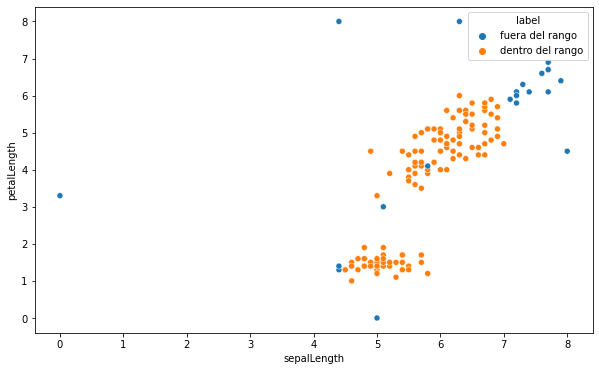

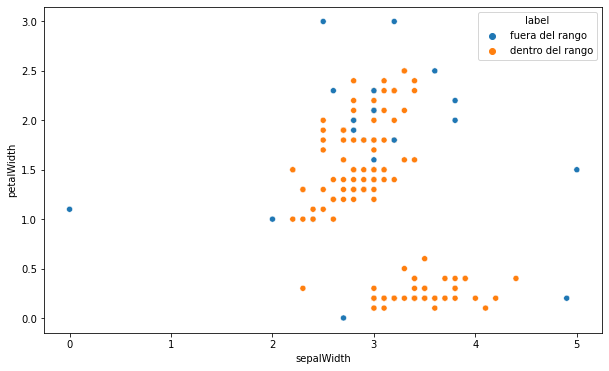

In [33]:
# grafico de puntos para sepalLength vs petalLength 
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='sepalLength',
    y='petalLength',
    hue='label',# color por label
    data=df,
)   
plt.show()

# grafico de puntos para sepalWidth vs petalWidth 
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='sepalWidth',
    y='petalWidth',
    hue='label',# color por label
    data=df,
)   
plt.show()

5. Filtre los datos válidos y realice un gráfico de *sepalLength* vs *petalLength* categorizados por la etiqueta **species**.

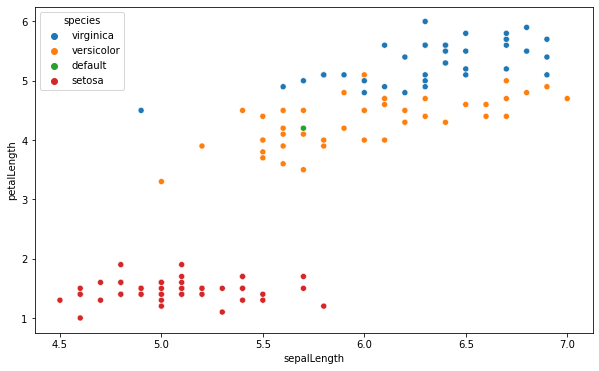

In [37]:
df_filtrado = df[mask_petalLength & mask_petalWidth & mask_sepalLength & mask_sepalWidth]

# grafico de puntos para sepalLength vs petalLength 
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='sepalLength',
    y='petalLength',
    hue='species',# color por especie
    data=df_filtrado,
)   
plt.show()
